In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:


file = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/videos_raw/mwitt/AXA_APR23_no_streams/AXA_2023-0011704/LGX010079.mp4'
if file.endswith('.mp4'):
    video_length_seconds = 0
    cap = cv2.VideoCapture(os.path.join(root, file))
    video_length_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    video_length_seconds = int(video_length_frames / cap.get(cv2.CAP_PROP_FPS))
    print(f'{file} has {video_length_frames} frames and is {video_length_seconds} seconds long')
    cap.release()



/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/videos_raw/mwitt/AXA_APR23_no_streams/AXA_2023-0011704/LGX010079.mp4 has 21240 frames and is 708 seconds long


In [23]:
df = pd.read_csv('./model_speeds.csv')
cpu_rows = df[df['device'] == 'cpu']
# add row index
cpu_rows['index'] = range(0, len(cpu_rows))

/tmp/ipykernel_3118791/2153567107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_rows['index'] = range(0, len(cpu_rows))


Text(0, 0.5, 'Time (s)')

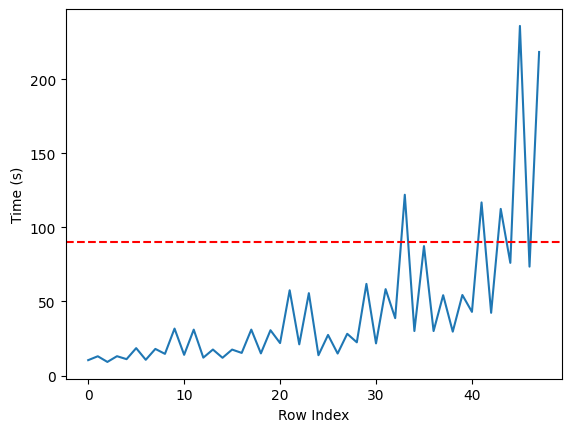

In [24]:
# plot the time value for each row index
video_length = 180
inference_goal = video_length * 0.5

plt.plot(cpu_rows['index'], cpu_rows['time'])
plt.axhline(y=inference_goal, color='r', linestyle='--')
plt.xlabel('Row Index')
plt.ylabel('Time (s)')

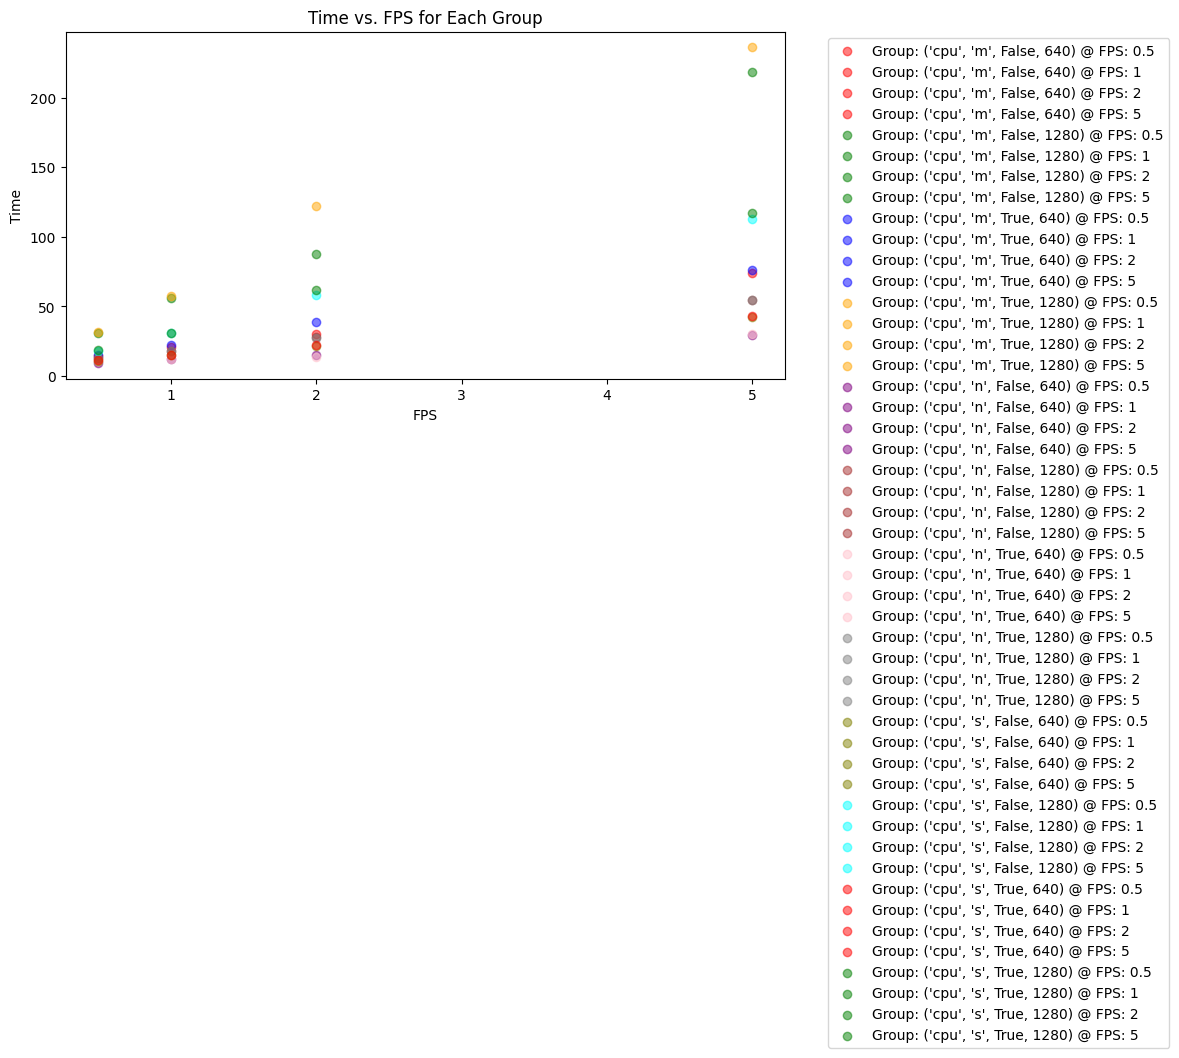

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group by device, size, tracked, imgsz
grouped = cpu_rows.groupby(['device', 'size', 'tracked', 'imgsz'])

# Define the fps values you're interested in
fpss = [0.5, 1, 2, 5]

# Colors for different groups, ensure there are enough for each group
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Initialize a figure
plt.figure(figsize=(12, 8))

# Counter for colors
color_idx = 0

# Iterate over each group
for name, group in grouped:
    # Check if we need to cycle the colors
    if color_idx >= len(colors):
        color_idx = 0
    
    # Plot time vs. fps for each group
    for fps in fpss:
        # Filter the group for the current fps and plot
        specific_fps_group = group[group['fps'] == fps]
        
        # Use scatter plot to show time for each fps
        plt.scatter([fps] * len(specific_fps_group), specific_fps_group['time'], alpha=0.5, label=f'Group: {name} @ FPS: {fps}', color=colors[color_idx])
    
    color_idx += 1

# Labeling the plot
plt.title('Time vs. FPS for Each Group')
plt.xlabel('FPS')
plt.ylabel('Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [29]:
print(cpu_rows[(cpu_rows['time'] < inference_goal) & (cpu_rows['tracked'] == True) & (cpu_rows['fps'] ==5)])


   device  fps size  tracked  imgsz       time  index
36    cpu  5.0    n     True    640  30.033610     36
37    cpu  5.0    n     True   1280  54.251188     37
40    cpu  5.0    s     True    640  42.993900     40
44    cpu  5.0    m     True    640  76.086984     44
